In [1]:
import requests
from IPython.core.display import HTML

#HTML(f"""
#<style>
#@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
#</style>
#""")

# Practical introduction to Python and Numpy

**Important**
Please use either _Jupyter Lab_ (not notebook) or _Visual Studio Code_ to solve the exercises.


<article class="message">
    <div class="message-body">
        <strong>Overview of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#norm">Task 1: Vector length</a>
            </li>
            <li>
            <a href="#comprehensions">Task 2: List comprehensions</a>
            </li>
            <li>
            <a href="#dotproduct">Task 3: Inner product</a>
            </li>
            <li>
            <a href="#indexing">Task 4: Array indexing</a>
            </li>
            <li>
            <a href="#norm_np">Task 5: Length using numpy</a>
            </li>
            <li>
            <a href="#angle">Task 6: Angle calculation</a>
            </li>
            <li>
            <a href="#distances">Task 7: Distances</a>
            </li>
        </ul>
    </div>
</article>

This exercise delves deeper into the syntax of Python and NumPy, providing guidelines for effectively working with arrays using both Python's native structures (called lists) and NumPy arrays. The first part of the exercise is about implementing basic linear algebra operations using native Python types while the second part is about using Numpy.
**Note:** Run each code cell as you progress through the exercise. Incomplete cells are part of tasks and have to be completed by you.

## Using native types in Python to implement basic linear algebra operations
The vectors `va`
 and `vb`
 are defined as:


In [2]:
va = [2, 2]
vb = [3, 4]

## Vector length
The length (L2-norm) of a vector is defined as

$$||v|| = \sqrt{\sum_{i=1}^N v_i^2}.$$

---
**Task 1 (easy): Vector length👩‍💻**
1. Implement the length as a Python function in the code cell below.
2. Calculate the length of the vectors `va`
 and `vb`
 using the implementation from (1).
3. Verify the result using pen and paper.

**Hints:** 
- For-loops in Python loop through the elements of an iterator and takes the current iterator value as the iteration variable, similar to for-each loops in Java.
- The `range(x)`
 function in Python returns an iterator of integers from $0,\dots, x-1$.
- The length of a list `l`
 can be found using the `len(l)`
 function.
- The `**`
 operator implements exponentiation in Python. For the square root of `x`
, use `x**(1/2)`
.
- Use Python's built in `help(<function/class/method>)`
 function for additional documentation. In Jupyter Lab, you can also open a documentation popover by pressing placing the text cursor on the desired symbol and pressing **Shift + Tab**.


---

In [3]:
import math
def magnitude(vector):
    sum_of_squares = 0
    
    for element in vector:
        # Square each element, and add to accumulator
        sum_of_squares += element ** 2
    
    #Squareroot of the sum accumulated  (** 1/2 is the same as square root)
    magnitude_value = sum_of_squares ** (1/2)
    
    return magnitude_value

#Short version
def length(v):
    return math.sqrt(sum([x**2 for x in v]))


print('a', length(va))
print('b', length(vb))
assert length(va) == 8**0.5
assert length(vb) == 5

a 2.8284271247461903
b 5.0


## List comprehensions
Using loops for list iteration requires quite a lot of boilerplate code. Fortunately, Python's _list comprehensions_ are 
created exactly for making list iteration more expressive and easier to understand.
A list comprehension has the following form
```python
[f(e) for e in list]


```

where $f$ is an arbitrary function applied to each element $e$. For people familiar with functional programming, this 
is equivalent to the `map`
 function. _Note: List comprehensions can also include guard rules. You can read more about 
list comprehensions [here](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
._
Python also provides a wealth of utility functions for performing common list operations. One such function is
```python
sum(l)


```

which sums all elements in the list argument.

---
**Task 2 (easy): List comprehensions👩‍💻**
1. Implement the `length2`
 function in the cell below by using a list comprehension and the [`sum`
 function](https://docs.python.org/3.10/library/functions.html#sum)
.    - First, exponentiate each element in a list comprehension, resulting in a new list of values.
    - Then use the `sum`
 function to add all elements and calculate the square root of the sum.


2. Verify the result using pen and paper.


---

In [4]:
def length2(vector):
    #Make a list with each element squared
    squared_elements = [element ** 2 for element in vector]
    
    #Take the squared list and sum it
    sum_of_squares = sum(squared_elements)
    
    #Square root of the summed values
    magnitude_value = sum_of_squares ** (1/2)
    
    return magnitude_value


print('a', length2(va))
print('b', length2(vb))
assert length2(va) == 8**0.5
assert length2(vb) == 5

a 2.8284271247461903
b 5.0



---
**Task 3 (easy): Inner product👩‍💻**
In this task you will calculate the dot product of two vectors using lists. Recall the definition of the dot product:

$$
a\cdot b = \sum_{i=1}^N a_ib_i.
$$
1. Complete the function `dot`
 below by implementing the equation for inner (dot) product using either for-loops or list 
comprehensions.    - _Note: If you want to use list comprehensions you need the function `zip`
 to interleave the two lists. The `zip`
 function is 
equivalent to `zip`
 in most functional programming languages. The documentation can be found 
[here](https://docs.python.org/3/library/functions.html#zip)
_


2. Test the implementation on `va`
 and `vb`
. Verify the results using pen and paper.


---

In [5]:
def dot(a, b):
    sum_of_products = 0
    for i in range(len(a)):
        #Multiply each element of a with the corresponding element in b
        sum_of_products += a[i] * b[i]
    return sum_of_products

# Tests
assert dot(va, vb) == 14

## Introducing Numpy
Numpy makes it way easier to work with multidimensional arrays and provides a significant performance increase. Refer to this week's tutorial
 for further information.
The following code imports the `numpy`
 package and creates a $3\times 3$ matrix:
**Note:** Note that the import statement renames `numpy`
 to `np`
. This is commonly done in Python to avoid namespace confusion.



In [6]:
import numpy as np

A = np.array([
    [1, 2, 3],
    [3, 4, 9],
    [5, 7, 3]
])

Use `A.shape`
 to get the dimensions (size) of the array. The `shape`
 property works on all Numpy arrays, e.g. `(A*2).shape`
 works as well (we will 
return to array operations later in this exercise).
The cell below prints the shape of `A`
:


In [7]:
A.shape

(3, 3)

## Slicing
Slicing allows you to select a sequence or area of array elements using the `<start>:<stop>`
 notation, e.g. `0:2`
. Inspect the code cell below for a few examples:

https://www.w3schools.com/python/numpy/trypython.asp?filename=demo_numpy_array_slicing_2d3


In [8]:
single = A[0]
print('single element', single)

vector = A[:2, 1] # 0's can be ommitted.
print('vector of elements', vector)

matrix = A[:, :2]
print('matrix of elements\n', matrix)

single element [1 2 3]
vector of elements [2 4]
matrix of elements
 [[1 2]
 [3 4]
 [5 7]]


It is possible to use negative indices. These are equivalent to counting from the end of the array, i.e. `-<idx>`

is equivalent to `len(a)-<idx>`
. A few examples:


In [9]:
single = A[-1, -1]
print('single', single)

arange = A[0:-2, 0:-1]
print('arange', arange)

single 3
arange [[1 2]]



**Info**
You can find the official documentation for Numpy slicing [here](https://numpy.org/doc/stable/user/basics.indexing.html)
.


---
**Task 4 (easy): Array indexing👩‍💻**
Use slicing to create the following variables:
1. Create a 2x2 matrix `ur`
 from of the upper right corner of `A`
.
2. Extract the 2nd row of `A`
 and store it in the variable `row`
.
3. Extract the 1st column of `A`
 and store it in the variable `col`
.


---

In [10]:
ur = A[0:2, 1:3]
row = A[1:2]
col = A[:,0]

print('upper right\n', ur)
print('row', row)
print('column', col)

# Tests
assert np.all(ur == np.array([[2, 3], [4, 9]]))
assert np.all(row == np.array([3, 4, 9]))
assert np.all(col == np.array([1, 3, 5]))

upper right
 [[2 3]
 [4 9]]
row [[3 4 9]]
column [1 3 5]


---
## Using Numpy array operations
While these implementations seem fine for small inputs, they become unbearingly slow for large arrays.
Let's try an example. The code below uses numpy to generate $1000000$-dimensional vectors of random numbers:


In [11]:
ta = np.random.randint(100, size=1000000)
tb = np.random.randint(100, size=1000000)

Jupyter notebooks support the command `%timeit <statement>`
, which runs a performance test on a given statement. This makes it possible to performance test the native implementation of the inner product from {{ ref(dotproduct) }}:


In [12]:
%timeit dot(ta, tb)

C:\Users\jgrum\AppData\Local\Temp\ipykernel_173296\2450873291.py:5: RuntimeWarning: overflow encountered in scalar add
  sum_of_products += a[i] * b[i]


134 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Not very fast, huh? Now, let's try using Numpy's built-in function for inner products, `np.dot`
:


In [13]:
%timeit np.dot(ta, tb)

320 μs ± 4.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


This is approximately 300 times faster than the native implementation (on the test computer, anyway)!. What about other list operations? Let's try the `sum`
 function:


In [14]:
%timeit sum(ta)
%timeit np.sum(ta)

33.1 ms ± 5.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
142 μs ± 6.73 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Again, a similar performance improvement. Because of its performance, Numpy should always be used instead of native Python wherever possible. In general, you should expect a speed improvement of several orders of magnitude when using Numpy.
## Adapting Python code to Numpy
This exercise is about adapting the `length`
 function implemented int [Task 1](#norm) to Numpy. Overloaded operators are common in Numpy. For example, to exponentiate the elements of a Numpy array `x`
 to the $4$'th power, simply use the `**`
 
operator on the array itself, i.e. `x**4`
.

---
**Task 5 (easy): Length using numpy👩‍💻**
1. In the cell below, implement `length_np`
 using Numpy. You can use Numpy's sum function (`np.sum`
).
2. Test it on the provided input `vec`
.


---

In [15]:
def length_np(v):

    #We use operator on the array itself, to square each element of the array
    #We add each squared element together, and in the end takes the square root
    return np.sqrt(np.sum(v**2))
    

vec = np.array([2, 3, 4, 5])
length_np(vec)

7.3484692283495345

Compare the Python and Numpy implementations using an array of random numbers:


In [16]:
vr = np.random.randint(100, size=10000)

%timeit length_np(vr)
%timeit length(vr)
%timeit length2(vr)

6.87 μs ± 36.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
710 μs ± 8.33 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
728 μs ± 6.18 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


This should reveal a large difference between the Numpy and Python implementations.
## Angles between vectors
The angle between vectors $\mathbf{u}$ and $\mathbf{v}$ is described by the following relation (as shown in the lecture):

$$
\cos \theta = \frac{\mathbf{u}\cdot \mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}
$$
_Note to self: Return the result as a tuple of (radians, degrees). Check what resources we currently have on tuples_

---
**Task 6 (easy): Angle calculation👩‍💻**
1. Use Numpy to implement the `angle`
 function in the code cell below. The function should return the angle in radians between inputs `a`
 and `b`
.
2. Verify the example below using pen and paper.


---

In [17]:
def angle(u, v):

    #First we calculate the products between u and v
    uv = np.dot(u, v)

    #Then we calculate the magnitudes of u and v
    u_magnitude = length_np(u)
    v_magnitude = length_np(v)

    #We calculate the angle between u and v, using the formula
    
    # We calculate the angle between u and v, using the formula
    angle_radians = np.arccos(uv / (u_magnitude * v_magnitude))
    return angle_radians
    


a = np.array([2, 3, 4])
b = np.array([0, -1, 2])
print(angle(a, b)) # The result should be: 1.1426035712129559
assert angle(a, b) == 1.1426035712129559

1.1426035712129559


## Distances
The Euclidean distance between two vectors $\mathbf{a}$ and $\mathbf{b}$ is calculated as the length of the difference vector between $\mathbf{a}$ and $\mathbf{b}$, i.e. $\|\mathbf{a}-\mathbf{b}\|$.

---
**Task 7 (medium): Distances👩‍💻**
1. Create two-dimensional vectors $\mathbf{a}=\begin{bmatrix}0\\0\end{bmatrix}$ and $\mathbf{b}=\begin{bmatrix}1\\1\end{bmatrix}$ using `np.zeros`
 and `np.ones`
 (refer to the tutorial for inspiration). Use the code cell below.
2. Calculate the distance between the points and print the result.
3. Create n-dimensional vectors $\mathbf{a}=\begin{bmatrix}0\\\vdots\\0\end{bmatrix}$ and $\mathbf{b}=\begin{bmatrix}1\\\vdots\\1\end{bmatrix}$ using `np.zeros`
 and `np.ones`
 (refer to the tutorial for inspiration) for $n=1, \dots, 10$. Calculate the distance between the vectors for each number of dimensions. Plot the distances as a function of $n$.
4. Explain the relationship in the figure between the number of dimensions and the distance.
5. _(optional)_ Derive a formula for the distance between $\mathbf{a}$ and $\mathbf{b}$ as a function of the number of dimensions $n$, i.e. $f(n)=?$


---

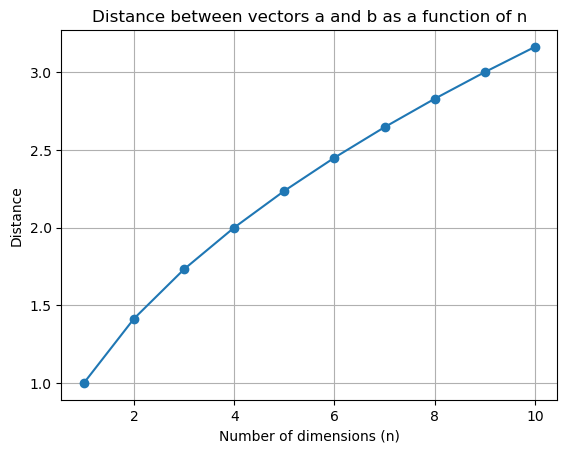

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize arrays to store the distances and the values of n
n_values = np.arange(1, 11)
distances = []

for n in n_values:
    a = np.zeros(n)  # n-dimensional vector of zeros
    b = np.ones(n)   # n-dimensional vector of ones
    
    # Calculate the Euclidean distance
    distance = np.linalg.norm(a - b)
    distances.append(distance)

# Plot the distance as a function of n
plt.plot(n_values, distances, marker='o')
plt.title('Distance between vectors a and b as a function of n')
plt.xlabel('Number of dimensions (n)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()
